Machine Learnig Bootcamp
HomeWork 2

Getting the data,
For this Homework,

In [112]:
import pandas as pd
import numpy as np


Data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [113]:
Data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Preparing the dataset
Use only the following columns:<br>

'engine_displacement',<br>
'horsepower',<br>
'vehicle_weight',<br>
'model_year',<br>
'fuel_efficiency_mpg'<br>

In [114]:
Data_1 = Data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
Data_1.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


EDA<br>
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

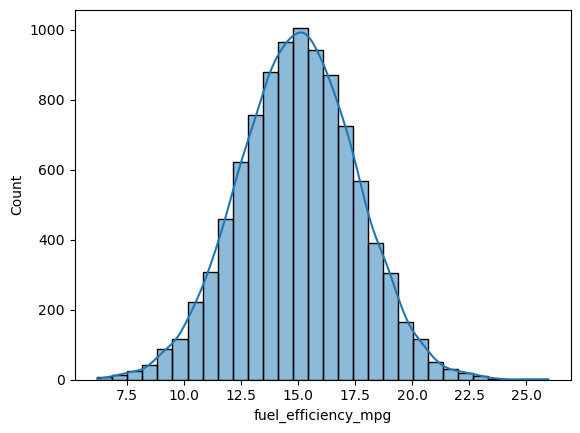

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(Data_1["fuel_efficiency_mpg"], bins=30, kde=True)
plt.show()

Question 1<br>
There's one column with missing values. What is it?<br>

1 : 'engine_displacement'<br>
2 :'horsepower'<br>
3 :'vehicle_weight'<br>
4 :'model_year'<br>

In [116]:
q1 = Data_1.isnull().sum().loc[lambda x : x>0].index[0]
print(f"Question 1 Answer is {q1}")

Question 1 Answer is horsepower


Question 2<br>
What's the median (50% percentile) for variable 'horsepower'?

In [117]:

q2 = Data_1['horsepower'].median()
print(f"Question 2 Answer is {q2}")

Question 2 Answer is 149.0


Prepare and split the dataset<br>
Shuffle the dataset (the filtered one you created above), use seed 42.<br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Use the same code as in the lectures<br>

In [118]:
def split_data(seed=42):
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    n = len(Data_1)
    n_train = int(0.6*n)
    n_val = int(0.2*n)
    df_train = df_train.iloc[idx[:n_train]]
    df_val = df_val.iloc[idx[n_train:n_train+n_val]]
    df_test = df_test.iloc[idx[n_train+n_val:]]
    return df_train, df_val, df_test

In [119]:
len(df_train),len(df_test),len(df_val)

(5824, 1940, 1940)

In [120]:
n= len(Data_1)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [121]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [122]:
n_val + n_test + n_train

9704

In [123]:
df_train = Data_1.iloc[:n_train]
df_val = Data_1.iloc[n_train:n_train+n_val]
df_test = Data_1.iloc[n_train+n_val:]

In [124]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [125]:
df_train = Data_1.iloc[idx[:n_train]]
df_val = Data_1.iloc[idx[n_train:n_train+n_val]]
df_test = Data_1.iloc[idx[n_train+n_val:]]

In [144]:
def split_data(seed=42):
    n = len(Data_1)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    n_train = int(0.6*n)
    n_val = int(0.2*n)
    df_train = Data_1.iloc[idx[:n_train]]
    df_val = Data_1.iloc[idx[n_train:n_train+n_val]]
    df_test = Data_1.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)  
    df_test = df_test.reset_index(drop=True)
    return df_train, df_val, df_test

In [127]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)  
df_test = df_test.reset_index(drop=True)
df_train.shape, df_val.shape, df_test.shape

((5824, 5), (1940, 5), (1940, 5))

In [128]:
y_train = np.array(df_train['fuel_efficiency_mpg'].values)
y_val = np.array(df_val['fuel_efficiency_mpg'].values)
y_test = np.array(df_test['fuel_efficiency_mpg'].values)

In [129]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [130]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

Question 3 <br>
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>

With Zeores 

In [131]:
X_train_0 = df_train.fillna(0)
X_val_0 = df_val.fillna(0)
X_test_0 = df_test.fillna(0)


With mean

In [132]:
X_train_mean = df_train.fillna(df_train['horsepower'].mean())
X_val_mean = df_val.fillna(df_val['horsepower'].mean())
X_test_mean = df_test.fillna(df_test['horsepower'].mean())

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_0 = LinearRegression()
model_mean = LinearRegression()

LinearRegression model with zero

In [134]:
model_0.fit(X_train_0, y_train)
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = round(np.sqrt(mean_squared_error(y_val, y_pred_0)), 2)

In [135]:
rmse_0

np.float64(0.52)

LinearRegression model with Mean

In [136]:
model_mean.fit(X_train_mean, y_train)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = round(np.sqrt(mean_squared_error(y_val, y_pred_mean)), 2)

In [137]:
rmse_mean

np.float64(0.46)

In [138]:
print(f"Question 3 Answer is With mean {rmse_mean} ")

Question 3 Answer is With mean 0.46 


Question 4
Now let's train a regularized linear regression.<br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>

In [139]:
from sklearn.linear_model import Ridge

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_0, y_train)
    y_pred = model.predict(X_val_0)
    rmse = mean_squared_error(y_val, y_pred)
    rmse_scores[r] = round(rmse, 2)

print(rmse_scores)

{0: 0.27, 0.01: 0.27, 0.1: 0.27, 1: 0.27, 5: 0.27, 10: 0.27, 100: 0.27}


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. <br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>
What's the value of std?<br>

In [154]:
rmses = []
for seed in range(0,9):
    df_train, df_val, df_test = split_data(seed)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1).fillna(0)
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1).fillna(0)
    model_0
    model_0.fit(X_train, y_train)
    y_pred = model_0.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmses.append(rmse)
std_rmse = round(np.std(rmses), 3)
print("RMSEs:", rmses)
print("Std of RMSE:", std_rmse)

RMSEs: [np.float64(0.5210993169571163), np.float64(0.5218422383663569), np.float64(0.5230384520087737), np.float64(0.5161215334656498), np.float64(0.5111869530271692), np.float64(0.5286833855606996), np.float64(0.5322418918557629), np.float64(0.5095258233917447), np.float64(0.5149083792394119)]
Std of RMSE: 0.007


In [155]:
print(f"Question 5 Answer is {std_rmse}")

Question 5 Answer is 0.007


Question 6
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>

In [160]:
len(df_full),len(y_full)

(7762, 7762)

In [164]:
df_train, df_val, df_test = split_data(9)
df_full = pd.concat([df_train, df_val])
y_full = df_full.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
X_train_full = df_full.drop('fuel_efficiency_mpg', axis=1).fillna(0)
X_test = df_test.drop('fuel_efficiency_mpg', axis=1).fillna(0)

In [166]:
len(df_full),len(y_full),len(y_test),len(X_test)

(7762, 7762, 1942, 1942)

In [167]:
model = Ridge(alpha=0.001)
model.fit(X_train_full, y_full)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [171]:
y_pred = model.predict(X_test)
rmse_test = round(math.sqrt(mean_squared_error(y_test, y_pred)), 3)
print(f"Question 6 Answer is {rmse_test}")


Question 6 Answer is 0.515


HomeWork 2 is complete!!